# Exploratory Data Analysis-EDA

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
cwd = Path.cwd()
DATASET_PATH = cwd / "rossmann-store-sales"
train = pd.read_csv(DATASET_PATH / "train.csv", parse_dates=["Date"], low_memory=False)
store = pd.read_csv(DATASET_PATH / "store.csv", low_memory=False)

*Basic information about train dataset:*

In [24]:
print("Dimenzije train seta:",train.shape)
print("\n=================================\n")
print(train.dtypes)


Dimenzije train seta: (1017209, 9)


Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object


In [25]:
num_cols = train.select_dtypes(np.number).columns
print("Broj numeričkih kolona:", len(num_cols))
print("Numeričke kolone:\n", num_cols.tolist())

cat_cols = train.select_dtypes(include=['object']).columns
print("\nBroj kategorijskih kolona:", len(cat_cols))
print("Kategorijske kolone:\n", cat_cols.tolist())

Broj numeričkih kolona: 7
Numeričke kolone:
 ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']

Broj kategorijskih kolona: 1
Kategorijske kolone:
 ['StateHoliday']


In [26]:
print("Uzimanje malog uzorka radi sticanja prvog utiska o dataset-u:")
train.iloc[[100, 10000, 100000]]

Uzimanje malog uzorka radi sticanja prvog utiska o dataset-u:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
100,101,5,2015-07-31,11075,915,1,1,0,1
10000,1081,4,2015-07-23,5582,956,1,0,0,1
100000,766,7,2015-05-03,0,0,0,0,0,0


In [27]:
pd.set_option('display.float_format', '{:.2f}'.format)

ignore = ['Store', 'DayOfWeek', 'Date']
num_cols = [c for c in train.columns if c not in ignore]

print("Statistike numerickih varijabli:")
train[num_cols].describe()


Statistike numerickih varijabli:


,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,5773.82,633.15,0.83,0.38,0.18
std,3849.93,464.41,0.38,0.49,0.38
min,0.00,0.00,0.00,0.00,0.00
25%,3727.00,405.00,1.00,0.00,0.00
50%,5744.00,609.00,1.00,0.00,0.00
75%,7856.00,837.00,1.00,1.00,0.00
max,41551.00,7388.00,1.00,1.00,1.00


In [28]:
print("Statistike kategorijskih varijabli:")
cat_cols = train.select_dtypes(include=['object']).columns
train[cat_cols].describe()

Statistike kategorijskih varijabli:


,StateHoliday
count,1017209
unique,4
top,0
freq,986159


Train dataset sadrzi 9 kolona. Kao primarni kljuc ovog seta smatramo jedinstveni identifikator filijale (Store) i Datum (Date). Ovaj slozeni kljuc je u test setu sjedinjen. Razlika izmedju trening i test seta je ta sto u trening setu imamo podatke o dnevnom pazaru i broju musterija za datu prodavnicu na odredjeni datum, dok u test setu dnevni pazar jeste target promenljiva. Pored toga, posedujemo podatke o otvorenosti prodavnice za konkretan datum, da li je tog dana ucestvovala u promociji (Promo), i da li je na taj datum neki drzavni praznik, ili skolski raspust.

Text(0.5, 1.0, 'Store 10 Sales Distribution')

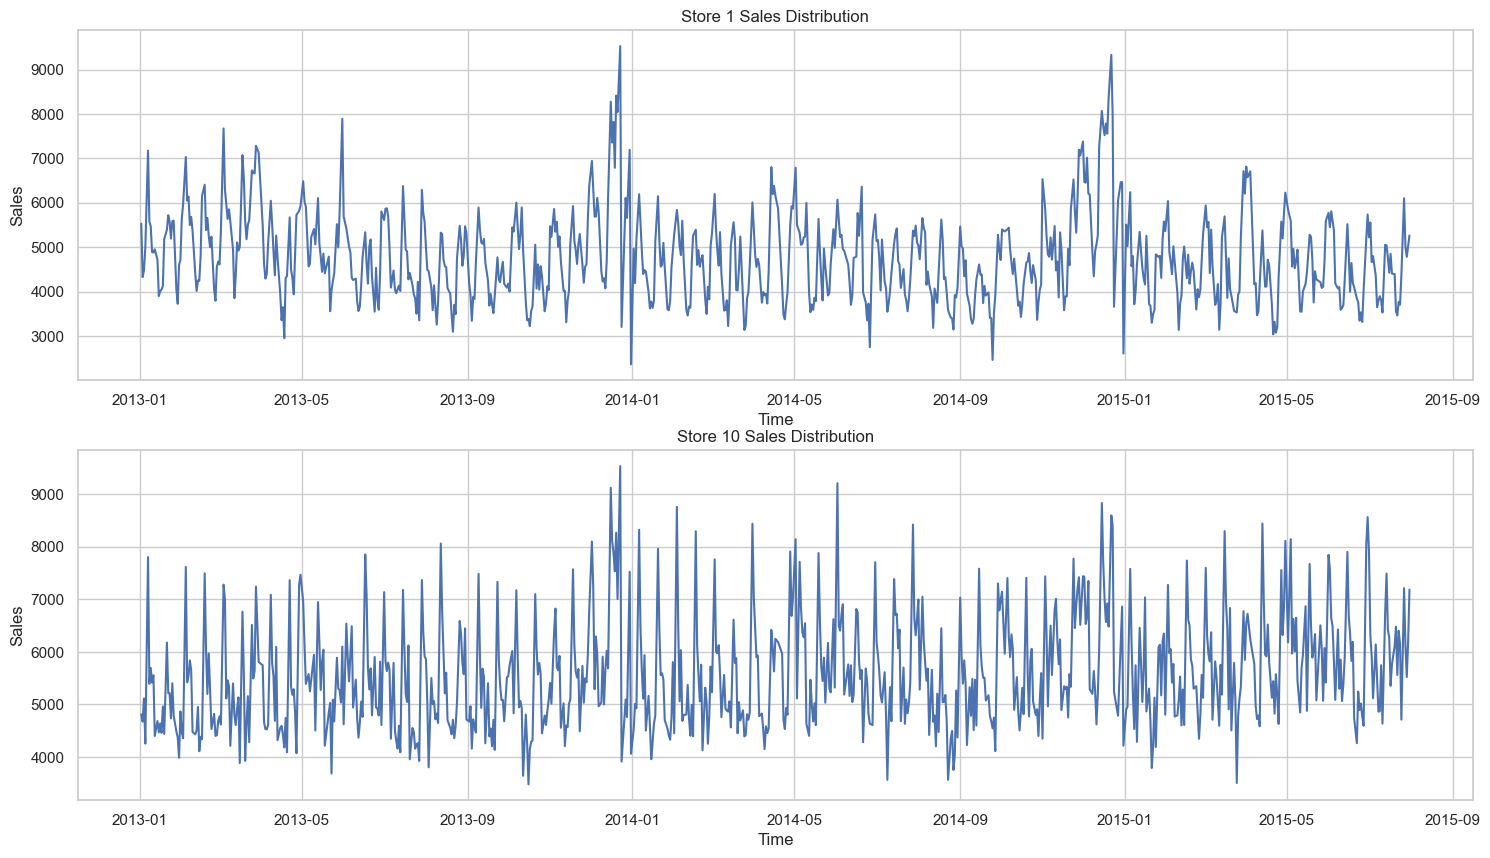

In [29]:
# Kretanje pazara za 2 nasumicne radnje kroz vreme
store_1 = train.loc[(train["Store"]==1)&(train['Sales']>0), ['Date',"Sales"]]
store_10 = train.loc[(train["Store"]==10)&(train['Sales']>0), ['Date',"Sales"]]
f = plt.figure(figsize=(18,10))
ax1 = f.add_subplot(211)
ax1.plot(store_1['Date'], store_1['Sales'], '-')
ax1.set_xlabel('Time')
ax1.set_ylabel('Sales')
ax1.set_title('Store 1 Sales Distribution')

ax2 = f.add_subplot(212)
ax2.plot(store_10['Date'], store_10['Sales'], '-')
ax2.set_xlabel('Time')
ax2.set_ylabel('Sales')
ax2.set_title('Store 10 Sales Distribution')

Ovde mozemo videti da su najbitniji periodi koji pokazuju najvecu prodaju kraj godine i pocetak nove (decembar i januar).Mozemo zakljuciti da je to posledica praznika u tom periodu godine.

c:\temp\ipykernel_5772\2436242461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, hue=None, palette="viridis", dodge=False)


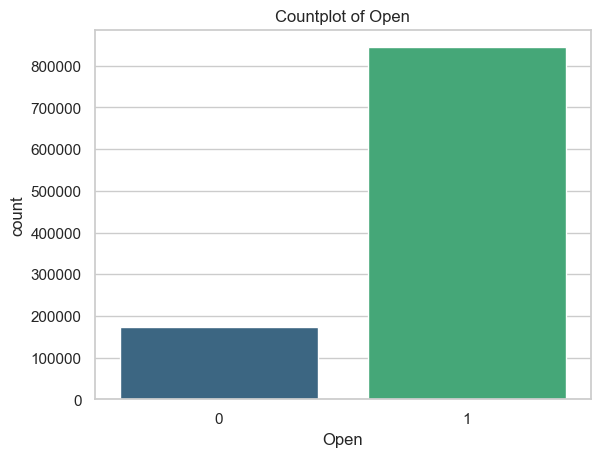

c:\temp\ipykernel_5772\2436242461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, hue=None, palette="viridis", dodge=False)


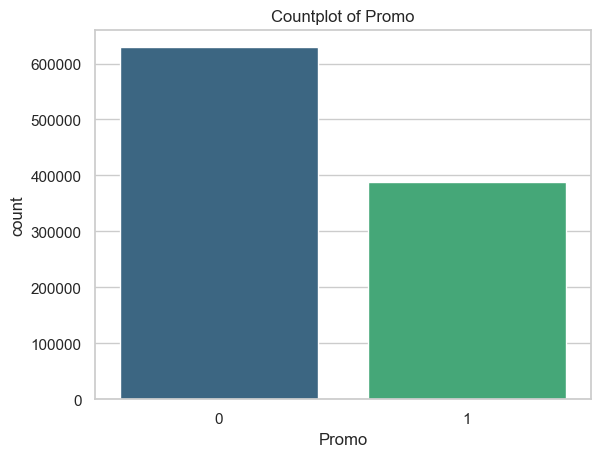

c:\temp\ipykernel_5772\2436242461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, hue=None, palette="viridis", dodge=False)


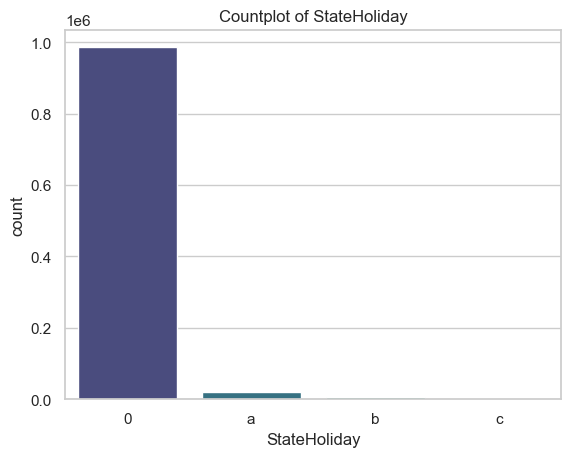

c:\temp\ipykernel_5772\2436242461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, hue=None, palette="viridis", dodge=False)


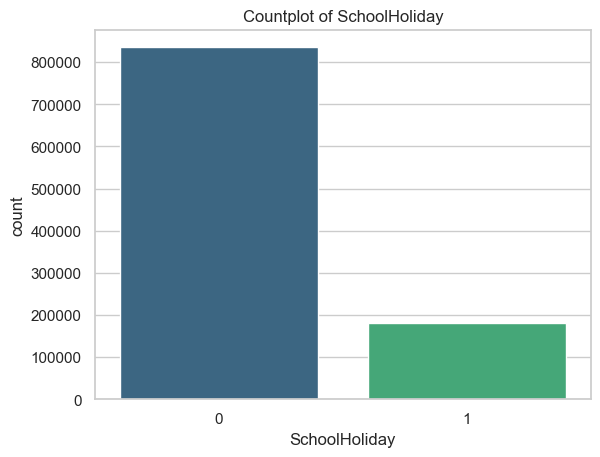

In [30]:
cols = ['Open', 'Promo', 'StateHoliday', 'SchoolHoliday']

for col in cols:
    sns.countplot(data=train, x=col, hue=None, palette="viridis", dodge=False)
    plt.title(f'Countplot of {col}')
    plt.show()

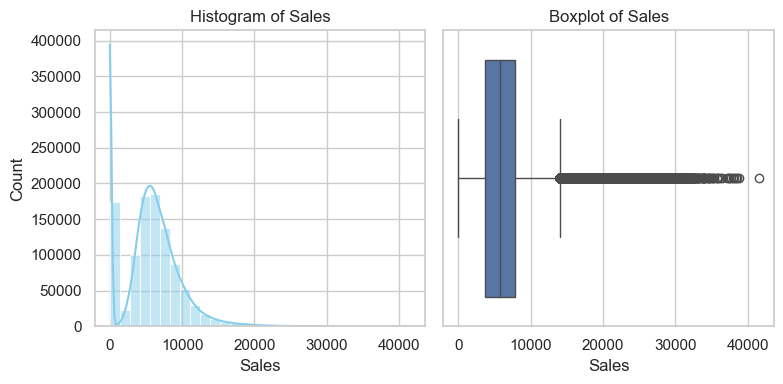

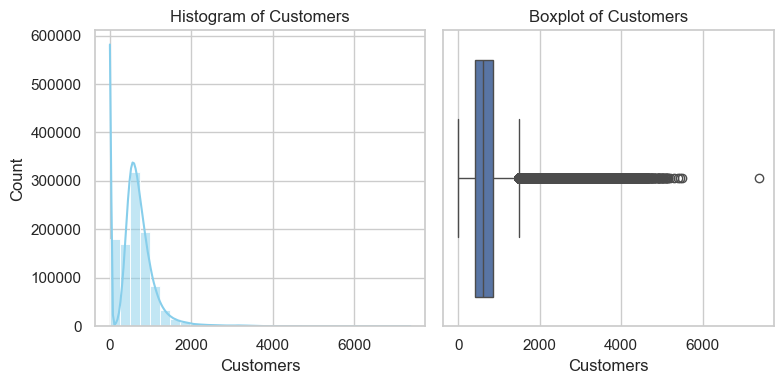

In [31]:
numerical_cols = ['Sales', 'Customers',]

sns.set(style="whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    sns.histplot(train[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(1,2,2)
    sns.boxplot(x=train[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


Zaklucujemo da je raspodela nasih kolona vrlo asimetrična i većina prodaja je niska, ali postoji značajan broj transakcija sa ekstremno visokim iznosima. Vecina podataka koncentrisanih oko nule se odnosi na dane kada su prodavnice bile zatvorene, (Open = 0), pa samim tim nije bilo ni prodaja.

## Handling outliers


Radi bolje vizuelizacije i lakseg razumevanja podataka prvo cemo srediti autlajere.
 Koristimo ograničavanje (Capping) bazirano na Interkvartilnom Opsegu (IQR) metodi (konkretno, Q3 + 1.5 IQR ili Q3 + 2 IQR). Ovaj pristup, umesto uklanjanja redova, zamenjuje ekstremno visoke vrednosti sa izračunatom gornjom granicom, čime se stabilizuje distribucija za potencijalno modeliranje zadržavaju svi redovi podataka, što je ključno za predviđanje visokih vrednosti prodaje. Takođe, pre obrade, podaci su filtrirani da bi se analizirali samo dani kada je prodavnica bila otvorena (Open == 1), čime se eliminiše uticaj nultih prodaja.

In [32]:

# nema prodaje kada je zatvoreno, radimo samo na otvorenim danima
train_open = train[train['Open'] == 1].copy()


def cap_outliers_iqr(df, column_name, iqr_multiplier=1.5):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    
    # U prodaji i broju kupaca ne očekujemo negativne vrednosti, 
    # tako da donju granicu postavljamo na 0 ako je IQR izračunao negativnu vrednost.
    final_lower_bound = max(0, lower_bound)

    # Pravimo kopiju serije koju ćemo modifikovati
    capped_series = df[column_name].copy()
    # Sve vrednosti > upper_bound postaju upper_bound
    num_outliers_upper = (capped_series > upper_bound).sum()
    capped_series[capped_series > upper_bound] = upper_bound
    
    num_outliers_lower = (capped_series < final_lower_bound).sum()
    capped_series[capped_series < final_lower_bound] = final_lower_bound
    
    stats = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound_calc': lower_bound, #izracunata
        'upper_bound_calc': upper_bound,
        'final_lower_bound': final_lower_bound, #prilagodjeena na 0
        'num_outliers_capped': num_outliers_upper + num_outliers_lower,
        'original_count': len(df)
    }

    return capped_series, stats

def print_outlier_stats(stats, column_name):
    print(f"=== Outlier Analysis for {column_name} (CAPPED) ===")
    print(f"Q1: {stats['Q1']:.2f}")
    print(f"Q3: {stats['Q3']:.2f}")
    print(f"IQR: {stats['IQR']:.2f}")
    print(f"Upper bound used for capping: {stats['upper_bound_calc']:.2f}")
    print(f"Values capped (outliers): {stats['num_outliers_capped']}")
    print(f"Total rows processed: {stats['original_count']}")
    print("-" * 50)


# sales
train_open['Sales_Capped'], stats_sales = cap_outliers_iqr(train_open, "Sales", 2)
print_outlier_stats(stats_sales, "Sales")

# customers
train_open['Customers_Capped'], stats_customers = cap_outliers_iqr(train_open, "Customers", 1.5)
print_outlier_stats(stats_customers, "Customers")

train.loc[train['Open'] == 1, 'Sales'] = train_open['Sales_Capped']
train.loc[train['Open'] == 1, 'Customers'] = train_open['Customers_Capped']



=== Outlier Analysis for Sales (CAPPED) ===
Q1: 4859.00
Q3: 8360.00
IQR: 3501.00
Upper bound used for capping: 15362.00
Values capped (outliers): 17662
Total rows processed: 844392
--------------------------------------------------
=== Outlier Analysis for Customers (CAPPED) ===
Q1: 519.00
Q3: 893.00
IQR: 374.00
Upper bound used for capping: 1454.00
Values capped (outliers): 40853
Total rows processed: 844392
--------------------------------------------------


Rezultati pokazuju da je ukupno 17662 prodaja i 40853 kupaca bilo iznad postavljenog gornjeg praga.Ove vrednosti su sada ograničene, što znači da su svi redovi zadržani u skupu podataka, ali su njihovi iznosi zamenjeni graničnom vrednošću (15362 za Sales i 1454 za Customers). Na taj način, ekstremne vrednosti nece iskrivljivati proračune modela, ali model i dalje uči iz svih uspešnih dana.

In [33]:
train['SalePerCustomer'] = train['Sales']/train['Customers']
train['SalePerCustomer'].describe()

count   844340.00
mean         9.57
std          2.12
min          0.00
25%          8.00
50%          9.36
75%         10.88
max         58.86
Name: SalePerCustomer, dtype: float64

Prosecno kupac potrosi 9.50$ po danu. Takodje ima dana kada je Sales 0.



In [34]:
train[(train.Open == 0) & (train.Sales == 0)].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
291,292,5,2015-07-31,0,0,0,1,0,1,NaN
875,876,5,2015-07-31,0,0,0,1,0,1,NaN
1406,292,4,2015-07-30,0,0,0,1,0,1,NaN
1990,876,4,2015-07-30,0,0,0,1,0,1,NaN
2521,292,3,2015-07-29,0,0,0,1,0,1,NaN


In [35]:
# opened stores with zero sales
zero_sales = train[(train.Open != 0) & (train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (54, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalePerCustomer
86825,971,5,2015-05-15,0,0,1,0,0,1,NaN
142278,674,4,2015-03-26,0,0,1,0,0,0,NaN
196938,699,4,2015-02-05,0,0,1,1,0,0,NaN
322053,708,3,2014-10-01,0,0,1,1,0,0,NaN
330176,357,1,2014-09-22,0,0,1,0,0,0,NaN


Postoje prodavnice koje su bile otvorene, ali nisu imale prodaje, sto moze biti posledica npr. nekih manifestacija u gradu ili drugih desavanja.

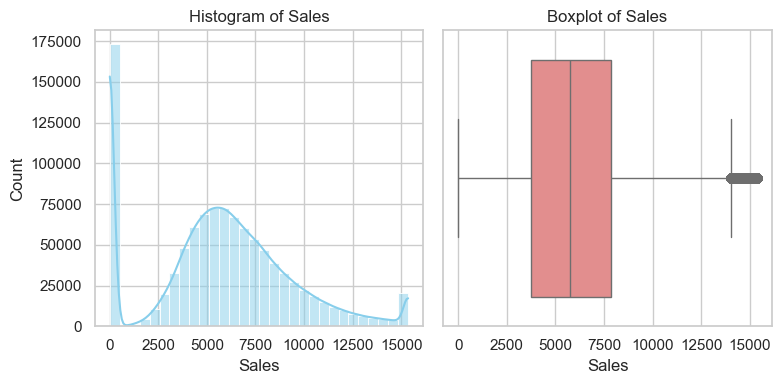

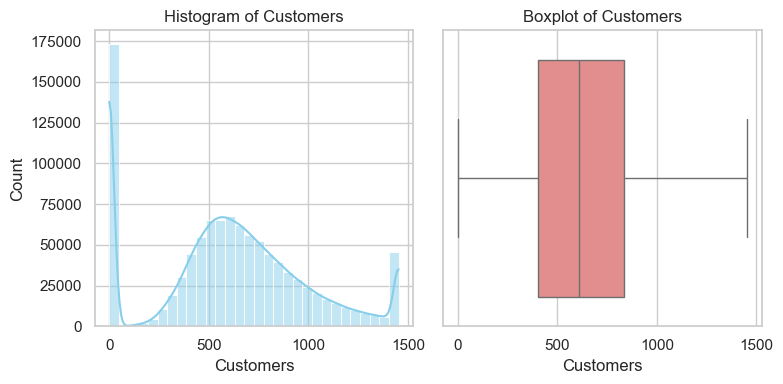

In [36]:
numerical_cols = ['Sales', 'Customers',]

sns.set(style="whitegrid")

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    sns.histplot(train[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(1,2,2)
    sns.boxplot(x=train[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


Zakljucujemo da je capping uradio sta je trebalo, vidimo tri peak-a, jedan na pocetku oko nule koji se odnosi na dane kada su prodavnice zatvorene, zatim drugi koji predstavlja najčešći, odnosno prosečan broj kupaca tokom tipičnog radnog dana kada prodavnice normalno posluju. Treci peak je rezultat cappinga.

In [37]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


In [38]:
train_store = pd.merge(train, store, how = 'left', on = 'Store')

In [39]:
train_store.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.00,5673.08,3750.18,0.00,3508.00,5618.00,7860.00,15362.00
b,15830.00,9441.83,4068.02,0.00,6227.00,9025.50,13082.75,15362.00
c,136840.00,5690.31,3612.20,0.00,3789.00,5766.00,7849.00,15362.00
d,312912.00,5624.09,3409.05,0.00,3986.00,5826.00,7691.00,15362.00


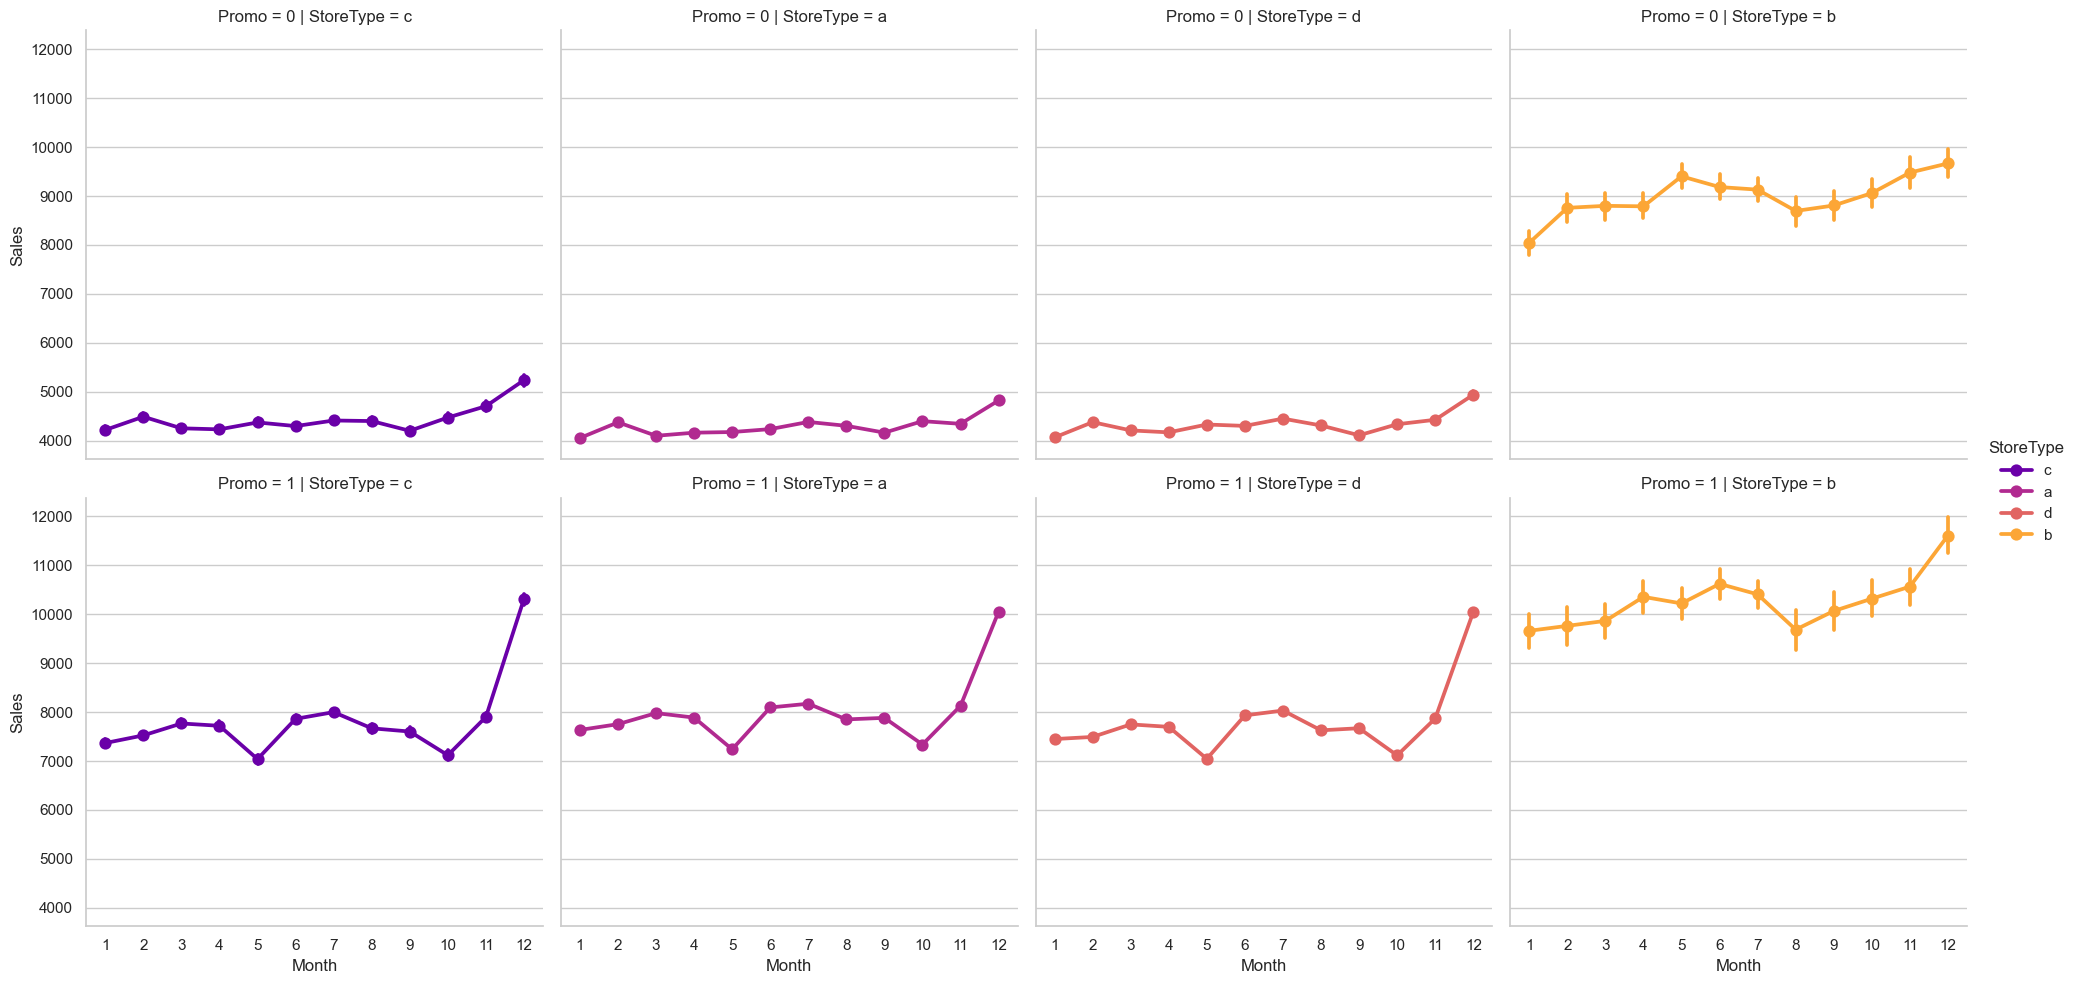

In [40]:
# sales trends
train_store['Date'] = pd.to_datetime(train_store['Date'])
train_store['Month']=train_store.Date.dt.month
train_store['Year']=train_store.Date.dt.year

sns.catplot(data = train_store, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               kind = 'point',
               hue = 'StoreType',
               row = 'Promo', # per promo in the store in rows
               color = 'blue',) 

Zaključak:
 * Promocija je izuzetno efikasna i predstavlja glavni faktor za povećanje prodaje u svim prodavnicama

 * StoreType b je dominantan u smislu apsolutne prosečne prodaje

 * Decembar je mesec gde vidimo skok prodaje u svim prodavnicama

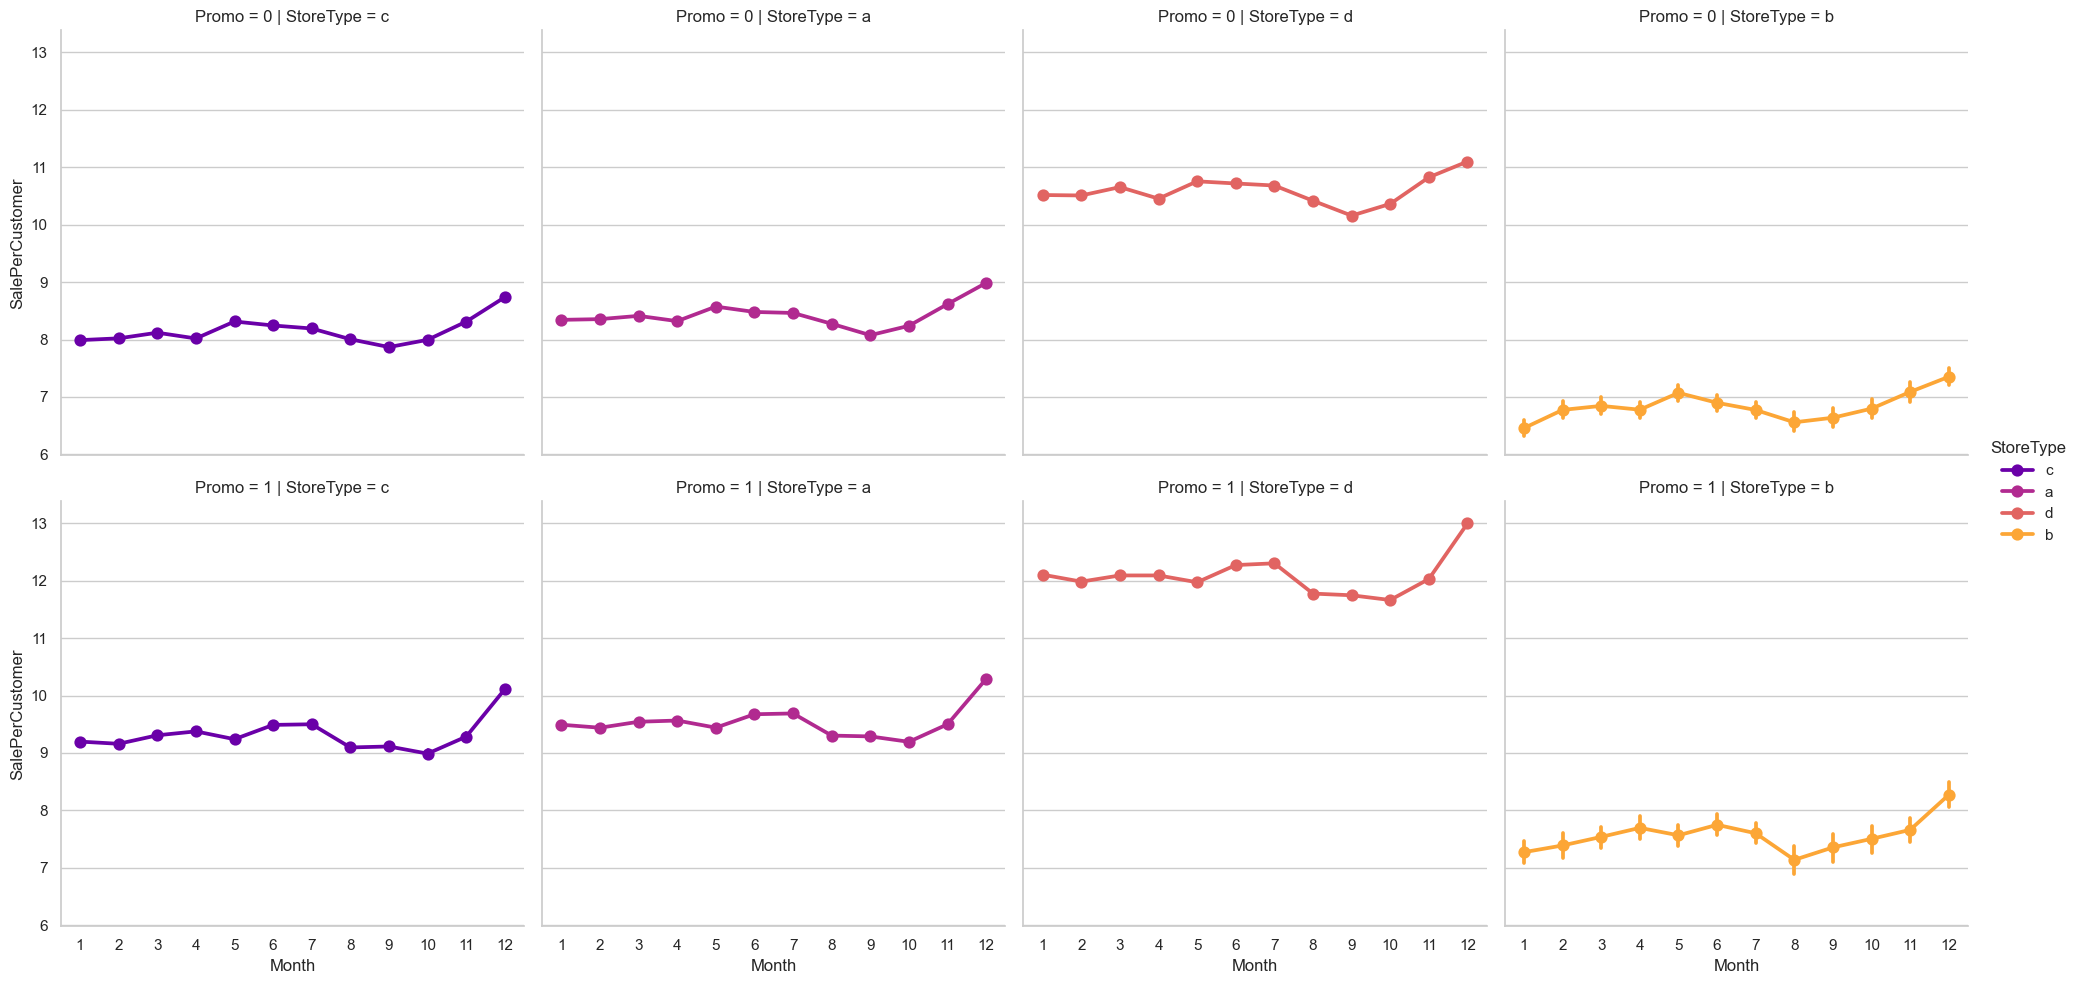

In [41]:
# sale per customer trends
sns.catplot(data = train_store, x = 'Month', y = "SalePerCustomer", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               kind='point',
               row = 'Promo', # per promo in the store in rows
               color = 'green',) 

Iako su prethodni grafikoni pokazali da StoreType B ima najveću ukupnu prodaju, u stvarnosti on ima najnižu prodaju po kupcu (SalePerCustomer), što ukazuje na to da kupci kupuju male količine. StoreType D je, s druge strane, najprofitabilniji po kupcu, sa prosečnom potrošnjom od oko 12€ uz promociju.